In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries and Dataset

In [106]:
#Importing the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [107]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.width",None)

In [108]:
#Reading the csv file

df = pd.read_csv('/content/drive/MyDrive/Data sets/Leads.csv')

#Basic Dataset Inspection

Checking the shape of the dataframe

In [109]:
df.shape

(9240, 37)

The given dataset has 9240 rows and 37 columns

In [110]:
#Checking the initial values

df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission          Google   

  Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0           No          No          0          0.0                            0   
1           No          No          0          5.0                          674   
2           No          No          1          2.0                         1532   
3           No          No          0          1.0                          305   
4           No          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country           Specialization  \
0                   0.0  Page Visited on Website     NaN                   Select   
1                   2.5             Email Opened   India                   Select   
2                   2.0             Email Opened   India  Business Administration   
3                   1.0              Unreachable   India    Media and Advertising   
4                   1.0        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine Newspaper Article  \
0                       Better Career Prospects     No       No                No   
1                       Better Career Prospects     No       No                No   
2                       Better Career Prospects     No       No                No   
3                       Better Career Prospects     No       No                No   
4                       Better Career Prospects     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses                                 Tags      Lead Quality  \
0                                     No          Interested in other courses  Low in Relevance   
1                                     No                              Ringing               NaN   
2                                     No  Will revert after reading the email          Might be   
3                                     No                              Ringing          Not Sure   
4                                     No  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City  \
0                                No                        No          Select  Select   
1                                No                        No          Select  Select   
2                                No                        No  Potential Lead  Mumbai   
3                                No                        

In [111]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000   
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820   
std     23405.995698     0.486714     4.854853                   548.021466              2.161418   
min    579533.000000     0.000000     0.000000                     0.000000              0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000   
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000   
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000   
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000   

       Asymmetrique Activity Score  Asymmetrique Profile Score  
count                  5022.000000                 5022.000000  
mean                     14.306252                   16.344883  
std                       1.386694                    1.811395  
min                       7.000000                   11.000000  
25%                      14.000000                   15.000000  
50%                      14.000000                   16.000000  
75%                      15.000000                   18.000000  
max                      18.000000                   20.000000

`Checking the unique columns of the dataframe`

In [112]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Checking for the count of missing values in each column of the data frame.

In [114]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are some columns with missing values and they'll be dealt with in the upcoming segment.

## Identifying and inspecting duplicate values within each column of the data frame

In [115]:
df.duplicated().sum()

0

There are no duplicate row entries in the dataframe

#Data cleaning

##Treatment of Select values

Firstly, we need to deal with the fact that many of the categorical variables have a value called 'Select'. It could be because the candidates did not select any of the values and instead chose the default option which is 'Select'. All select values should be null as they're equivalent to null.

## Searching for columns in the data frame where 'Select' is a category.

In [116]:
#List of columns that have the value 'Select'

columns_with_select = [col for col in df.columns  if df[col].isin(['Select']).sum()>1]
columns_with_select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [117]:
#Count of select values in the columns

df.isin(['Select']).sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

## Replacing columns with 'Select' as a category with NaN in the data frame.

In [118]:
df = df.replace('Select', np.nan)

In [119]:

columns_with_select = [col for col in df.columns  if df[col].isin(['Select']).sum()>1]
columns_with_select


[]

## Verifying if all columns have been successfully replaced


In [120]:
df.isin(['Select']).sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

The value 'Select' has been removed from all the columns in the dataframe.

##Missing Values

## Evaluating the percentage of missing values in each column of the dataframe

In [121]:
#Missing values in percentage

100*df.isna().mean().sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Dropping columns with missing values exceeding 40%.

In [122]:
dropped_columns = [col for col in df.columns if 100*df[col].isna().mean()>40]

In [123]:
df = df.drop(labels = dropped_columns,axis=1)
df.shape

(9240, 30)

###Handling missing values for Categorical Columns

In [124]:
cat_cols = [col for col in df.columns if df.dtypes[col] == "object"]
cat_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [125]:
cat_cols_na = [col for col in cat_cols if (df[col].isna().mean()*100)>0]
cat_cols_na

['Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City']

####Lead Source imputation

In [126]:
df['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [127]:
df['Lead Source'].isna().sum()

36

In [128]:
df['Lead Source'] = df['Lead Source'].replace(np.nan,df['Lead Source'].mode()[0])

In [129]:
df['Lead Source'].isna().sum()

0

In [130]:
df['Lead Source'].value_counts(normalize=True)

Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

####Last Activity Imputation

In [131]:
df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [132]:
df['Last Activity'].isna().sum()

103

In [133]:
df['Last Activity'] = df['Last Activity'].replace(np.nan,df['Last Activity'].mode()[0])

####Country Imputation

In [134]:
df['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

Country is a highly skewed column. This will cause bias in the model. This column can be dropped.

In [135]:
df = df.drop(['Country'], axis=1)
df.shape

(9240, 29)

####Specialization Imputation

In [136]:
df['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [137]:
df['Specialization'].isna().sum()

3380

In [138]:
df['Specialization'] = df['Specialization'].replace(np.nan,'Others')

In [139]:
df['Specialization'].isna().sum()

0

####What is your current occupation Imputation

In [140]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Although, this is also a skewed column, but it seems important to the current business problem

In [141]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan,df['What is your current occupation'].mode()[0])

####What matters most to you in choosing a course Imputation

In [142]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Dropping the skewed column

In [143]:
df['What matters most to you in choosing a course'].isna().sum()

2709

In [144]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,df['What matters most to you in choosing a course'].mode()[0])

####Tags Imputation

In [145]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [146]:
df['Tags'].isna().sum()

3353

In [147]:
df= df.drop('Tags',axis=1)

####City imputation

In [148]:
df['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [149]:
df['City'].isna().mean()*100

39.70779220779221

City has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

In [150]:
df = df.drop('City', axis=1)

###Handling Missing values for numerical values

In [151]:
df.isna().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

####Total Visits Imputation

In [152]:
df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [153]:
df['TotalVisits'] = df['TotalVisits'].replace(np.nan, df['TotalVisits'].mode()[0])

In [154]:
df['TotalVisits'].value_counts()

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

####Page Views Per Visit Imputation

In [155]:
df['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [156]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan,df['Page Views Per Visit'].mode()[0])

In [157]:
df['Page Views Per Visit'].isna().sum()

0

##Unwanted Columns

###Dropping columns with one unique value

In [158]:
df.describe(include = 'object')

Prospect ID              Lead Origin Lead Source Do Not Email  \
count                                   9240                     9240        9240         9240   
unique                                  9240                        5          21            2   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission      Google           No   
freq                                       1                     4886        2904         8506   

       Do Not Call Last Activity Specialization What is your current occupation  \
count         9240          9240           9240                            9240   
unique           2            17             19                               6   
top             No  Email Opened         Others                      Unemployed   
freq          9238          3540           3380                            8290   

       What matters most to you in choosing a course Search Magazine Newspaper Article  \
count                                           9240   9240     9240              9240   
unique                                             3      2        1                 2   
top                          Better Career Prospects     No       No                No   
freq                                            9237   9226     9240              9238   

       X Education Forums Newspaper Digital Advertisement Through Recommendations  \
count                9240      9240                  9240                    9240   
unique                  2         2                     2                       2   
top                    No        No                    No                      No   
freq                 9239      9239                  9236                    9233   

       Receive More Updates About Our Courses Update me on Supply Chain Content  \
count                                    9240                              9240   
unique                                      1                                 1   
top                                        No                                No   
freq                                     9240                              9240   

       Get updates on DM Content I agree to pay the amount through cheque  \
count                       9240                                     9240   
unique                         1                                        1   
top                           No                                       No   
freq                        9240                                     9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

These are the columns with 1 unique value:

*   Magazine
*   Receive More Updates About Our Courses
*   Update me on Supply Chain Content
*   Get updates on DM Content
*   I agree to pay the amount through cheque

These columns can be dropped as they only have one value input from the consumers






In [159]:
df = df.drop(['Magazine',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque'], axis=1)

###Dropping nominal columns

In [160]:
df = df.drop(['Prospect ID',	'Lead Number','Last Notable Activity'],axis=1)

###Skewed columns

In [161]:
cat_cols = [col for col in df.columns if df.dtypes[col] == "object"]
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

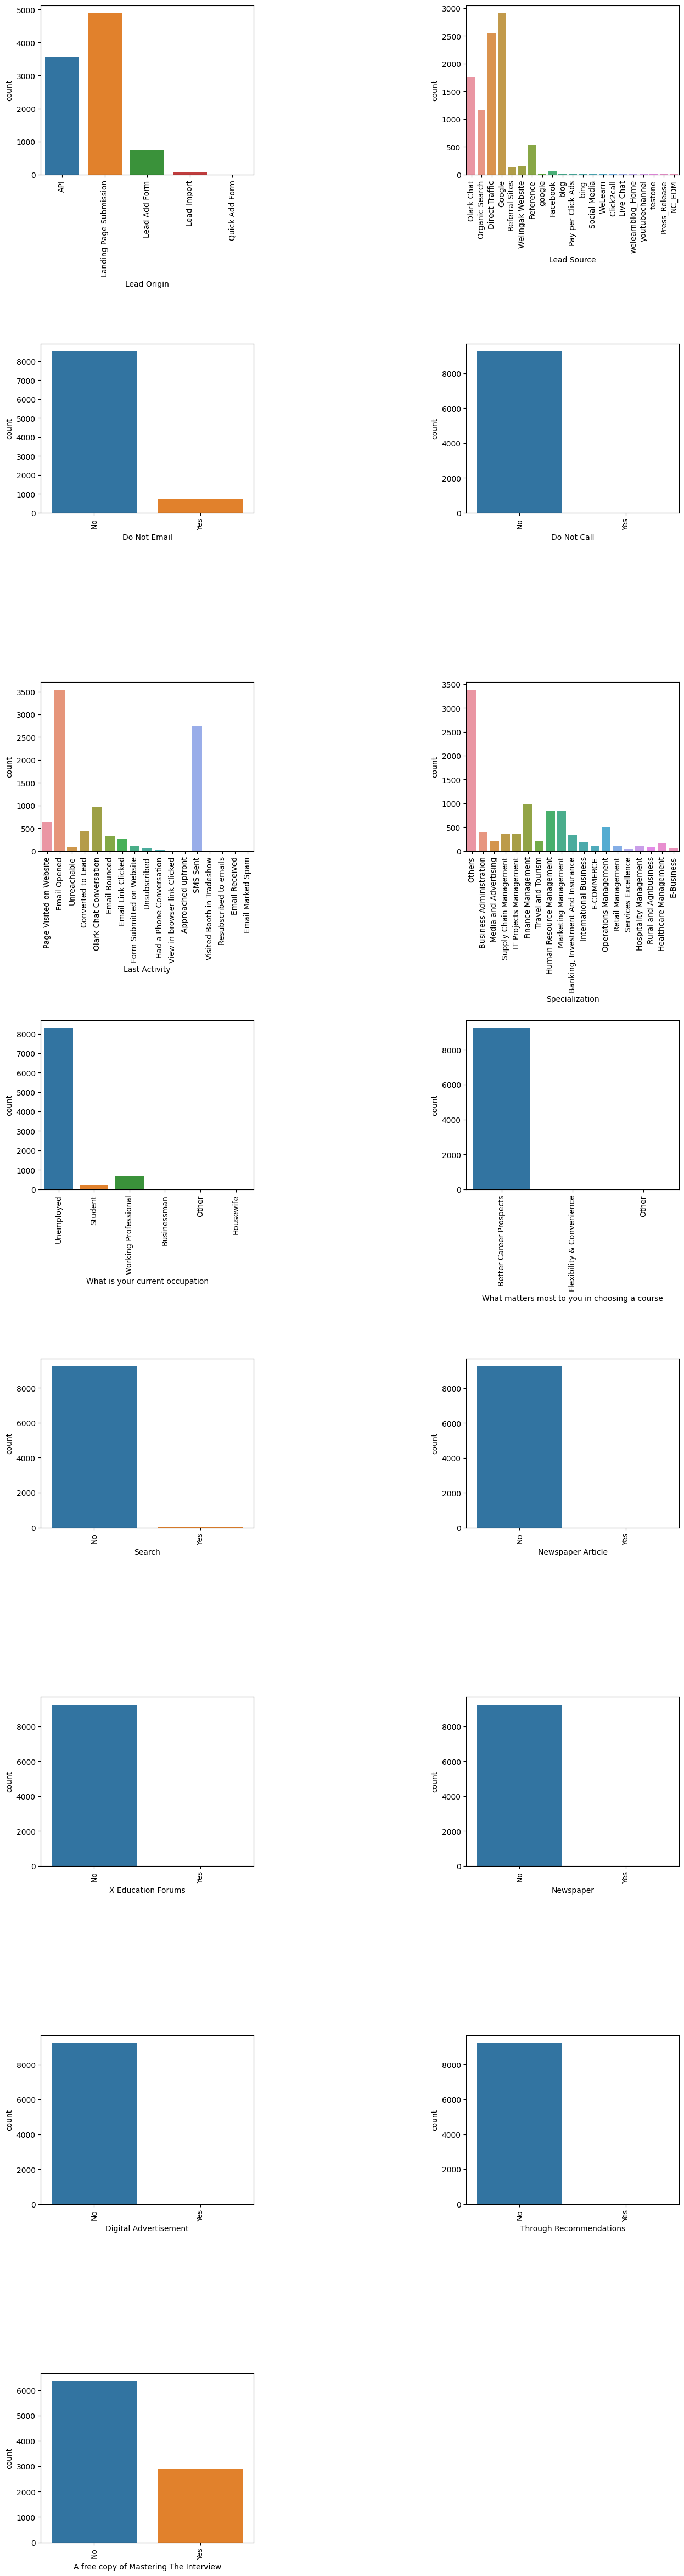

In [162]:
plt.figure(figsize=(15,60))

plt.subplots_adjust(wspace=1, hspace=1)
for i in enumerate(cat_cols):
  plt.subplot(8,2,i[0]+1)
  sns.countplot(x=i[1],data=df)
  plt.xticks(rotation=90)


Following columns have highly skewed data:


*   Through Recommendations
*   Digital Advertisement
*   Newspaper
*   X Education Forums
*   Newspaper Article
*   Search
*   What matters most to you in choosing a course
*   Do Not Call

Dropping the above columns












In [163]:
df = df.drop(['Through Recommendations',
'Digital Advertisement',
'Newspaper',
'X Education Forums',
'Newspaper Article',
'Search',
'What matters most to you in choosing a course',
'Do Not Call'], axis=1)

In [164]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat           No          0          0.0   
1                      API  Organic Search           No          0          5.0   
2  Landing Page Submission  Direct Traffic           No          1          2.0   
3  Landing Page Submission  Direct Traffic           No          0          1.0   
4  Landing Page Submission          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation A free copy of Mastering The Interview  
0                   Others                      Unemployed                                     No  
1                   Others                      Unemployed                                     No  
2  Business Administration                         Student                                    Yes  
3    Media and Advertising                      Unemployed                                     No  
4                   Others                      Unemployed                                     No

###Outlier Analysis

In [165]:
df.describe()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000  9240.000000                  9240.000000           9240.000000
mean      0.385390     3.394156                   487.698268              2.327787
std       0.486714     4.836682                   548.021466              2.164258
min       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     0.000000                    12.000000              0.000000
50%       0.000000     3.000000                   248.000000              2.000000
75%       1.000000     5.000000                   936.000000              3.000000
max       1.000000   251.000000                  2272.000000             55.000000

In [166]:
num_cols = ['TotalVisits',	'Total Time Spent on Website',	'Page Views Per Visit']

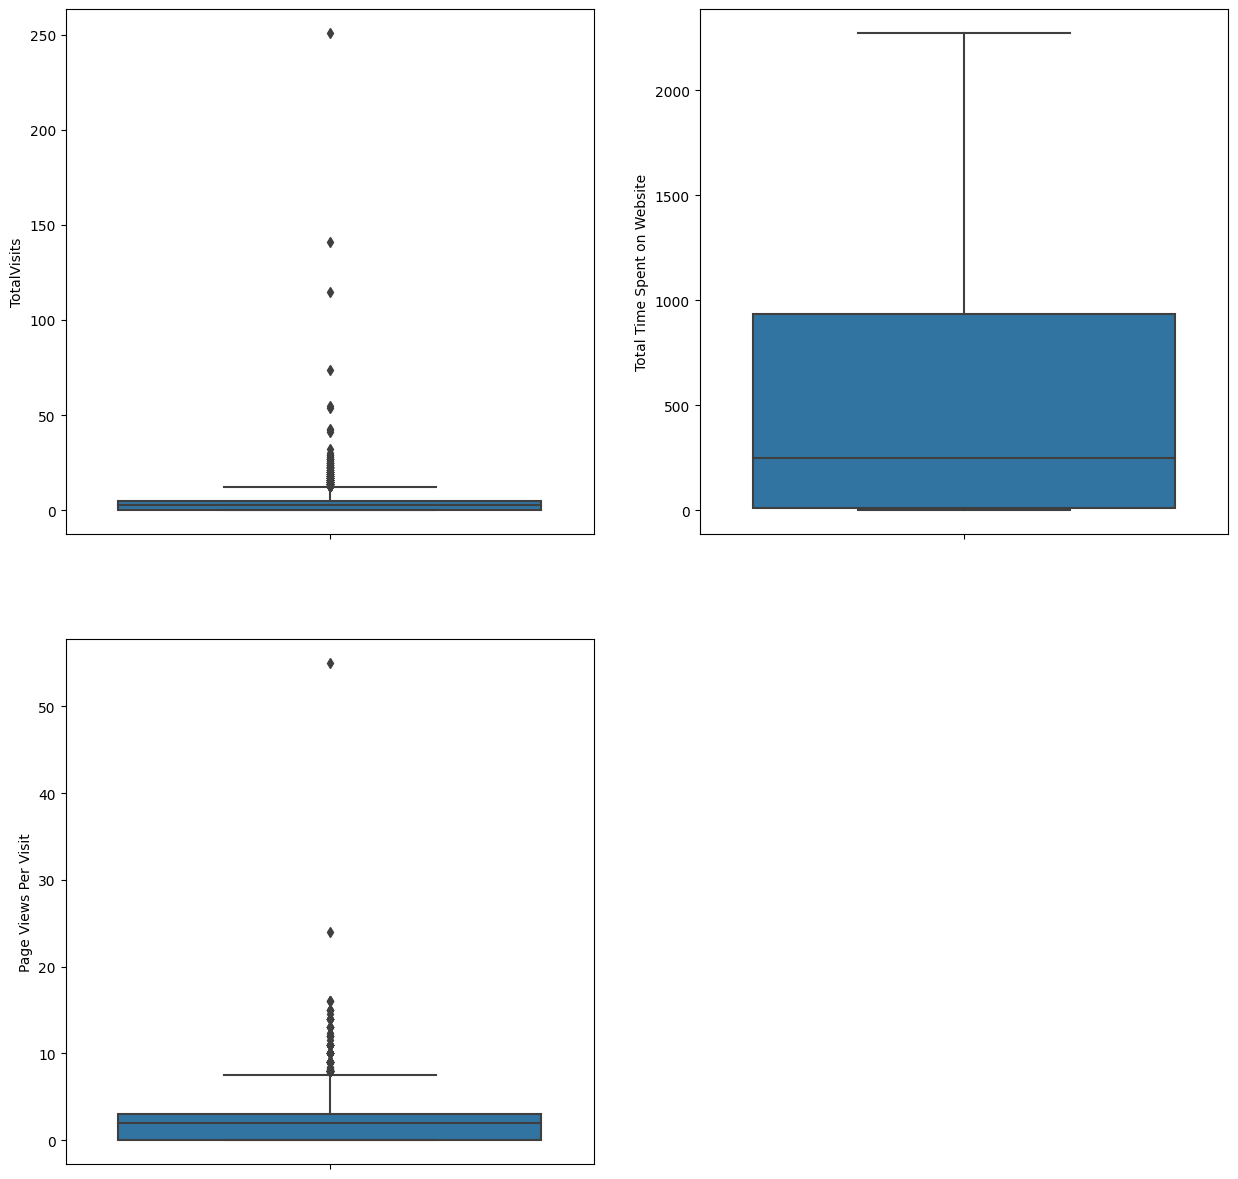

In [167]:
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
  plt.subplot(2,2,i[0]+1)
  sns.boxplot(y=i[1], data=df)

In [168]:
#Creating a UDF to cap the outliers

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [169]:
cols_2_cap = ['TotalVisits','Page Views Per Visit']

Outlier_treatment(df,cols_2_cap)

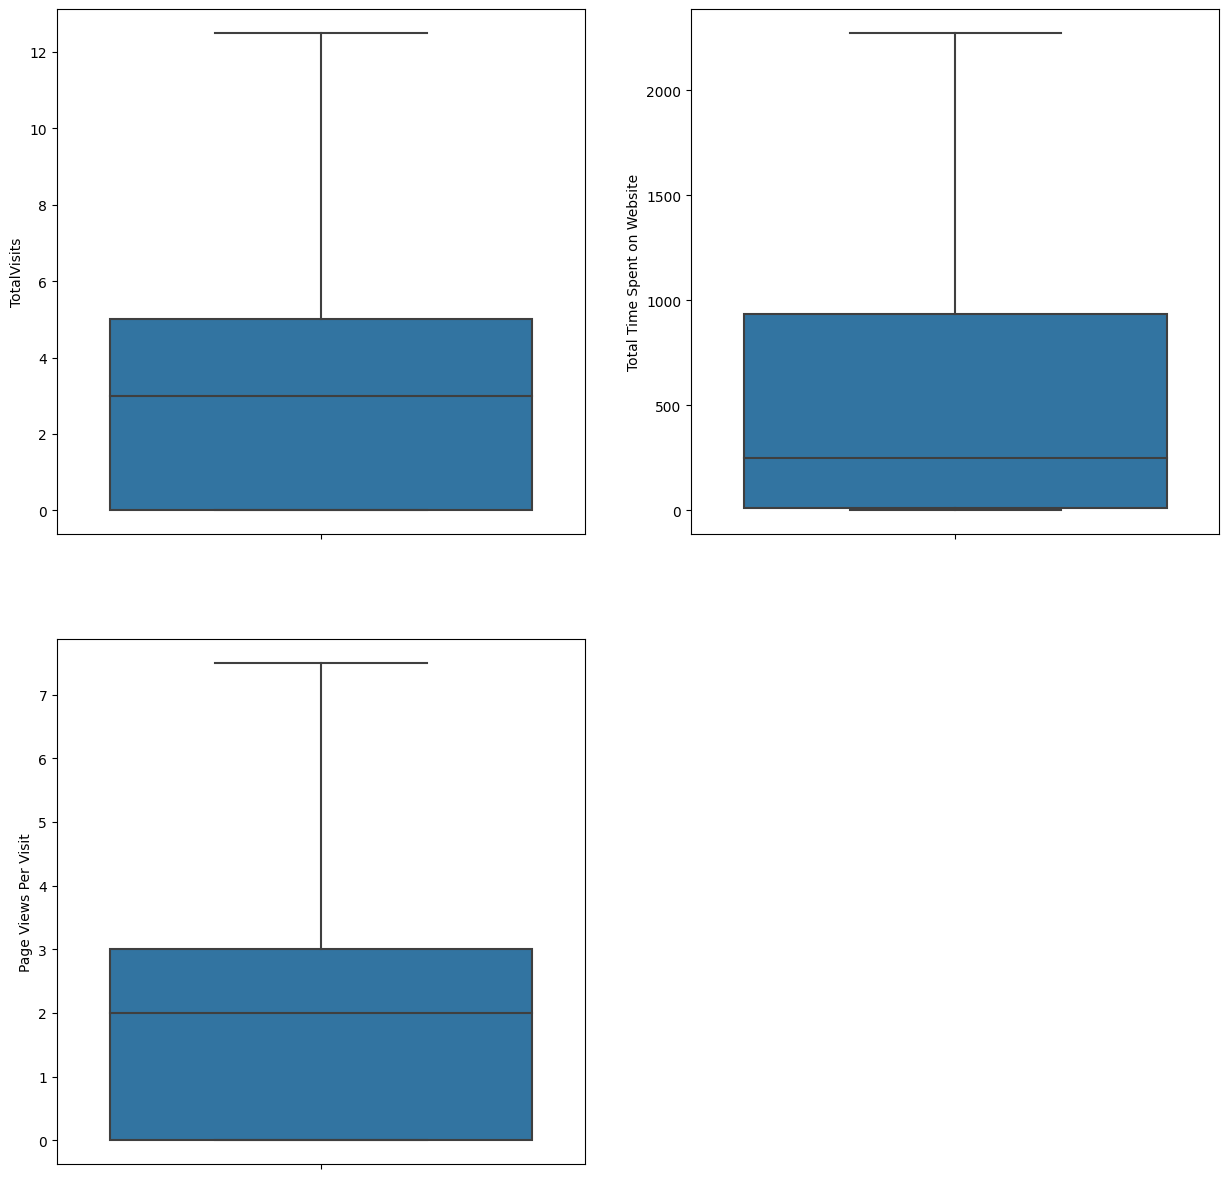

In [170]:
#Checking the outliers again

plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
  plt.subplot(2,2,i[0]+1)
  sns.boxplot(y=i[1], data=df)

###Standardizing Data in columns

In [171]:
#Checking all the categorical values

new_cat_cols = [col for col in df.columns if df.dtypes[col] == "object"]

for i in new_cat_cols:
        perc=100*df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_"*40,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

________________________________________ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Sour

Some columns have categories that have very few records. Bunching them together here would help while creating dummy variables

Also we can see "Google" & "google" are same in "Lead Source", so we will group them together

In [172]:
# Grouping low frequency value levels to Others
df['Lead Source'] = df['Lead Source'].replace(['bing','google',
'Click2call',
'Press_Release',
'Social Media',
'Live Chat',
'youtubechannel',
'testone',
'Pay per Click Ads',
'welearnblog_Home',
'WeLearn',
'blog',
'NC_EDM'],'Others')

# Changing google to Google
df['Lead Source'] = df['Lead Source'].replace("google","Google")

In [173]:
df['Lead Source'].value_counts(normalize=True)*100

Google              31.428571
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.303030
Name: Lead Source, dtype: float64

In [174]:
# Grouping low frequency value levels to Others
df['Last Activity'] = df['Last Activity'].replace(['Unsubscribed',
'Had a Phone Conversation',
'Approached upfront',
'View in browser link Clicked',
'Email Received',
'Email Marked Spam',
'Visited Booth in Tradeshow',
'Resubscribed to emails'],'Others')

In [175]:
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Others                        1.212121
Unreachable                   1.006494
Name: Last Activity, dtype: float64

In [176]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat           No          0          0.0   
1                      API  Organic Search           No          0          5.0   
2  Landing Page Submission  Direct Traffic           No          1          2.0   
3  Landing Page Submission  Direct Traffic           No          0          1.0   
4  Landing Page Submission          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation A free copy of Mastering The Interview  
0                   Others                      Unemployed                                     No  
1                   Others                      Unemployed                                     No  
2  Business Administration                         Student                                    Yes  
3    Media and Advertising                      Unemployed                                     No  
4                   Others                      Unemployed                                     No

In [177]:
#Mapping all the Yes and No values to 0 and 1 and changing the column name to Free_copy

df['Do Not Email'] = df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df['Free_copy'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [178]:
df.drop('A free copy of Mastering The Interview',axis=1,inplace=True)

#EDA

###Checking Data imbalance

Imbalance is to be checked in the Target Variable ('Converted') to determent if the distribution of data is uneven.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

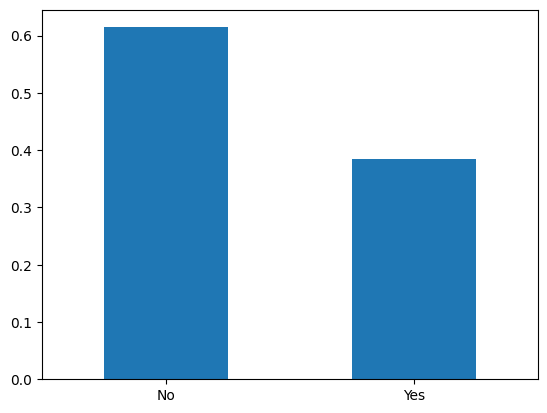

In [179]:
df['Converted'].value_counts(normalize=True).plot.bar()

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

About a little less than 40% of the time the leads converted, otherwise the leads weren't converted

In [180]:
### Ratio of Data Imbalance
ratio=(df["Converted"].value_counts(normalize=True).loc[0])/(df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


##Univariate Analysis

In [181]:
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat             0          0          0.0   
1                      API  Organic Search             0          0          5.0   
2  Landing Page Submission  Direct Traffic             0          1          2.0   
3  Landing Page Submission  Direct Traffic             0          0          1.0   
4  Landing Page Submission          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  Free_copy  
0                   Others                      Unemployed          0  
1                   Others                      Unemployed          0  
2  Business Administration                         Student          1  
3    Media and Advertising                      Unemployed          0  
4                   Others                      Unemployed          0

In [182]:
cat_cols = ["Lead Origin","What is your current occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

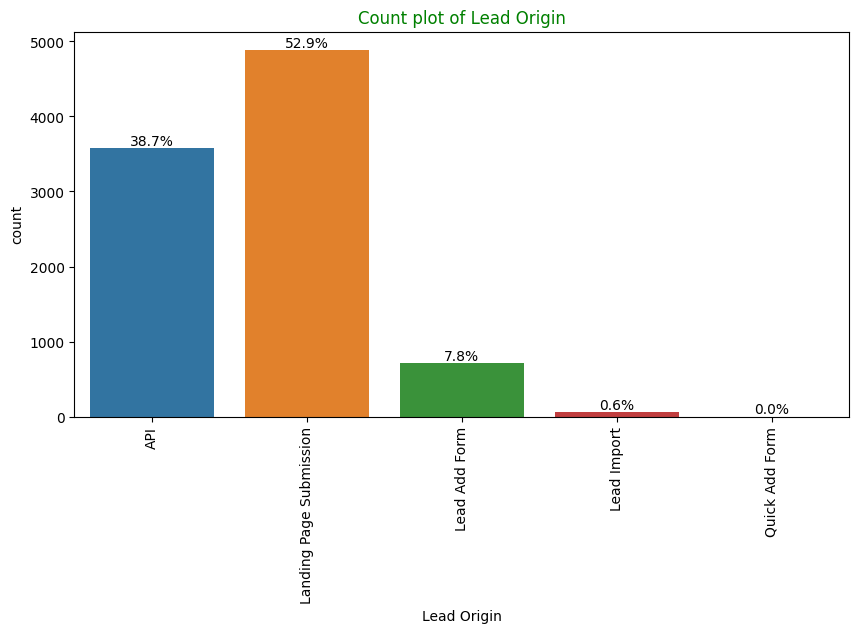

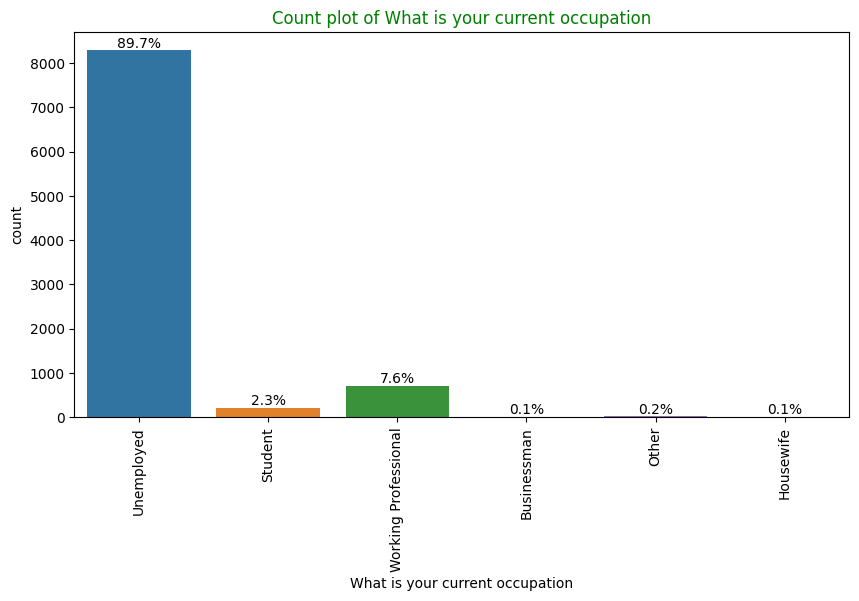

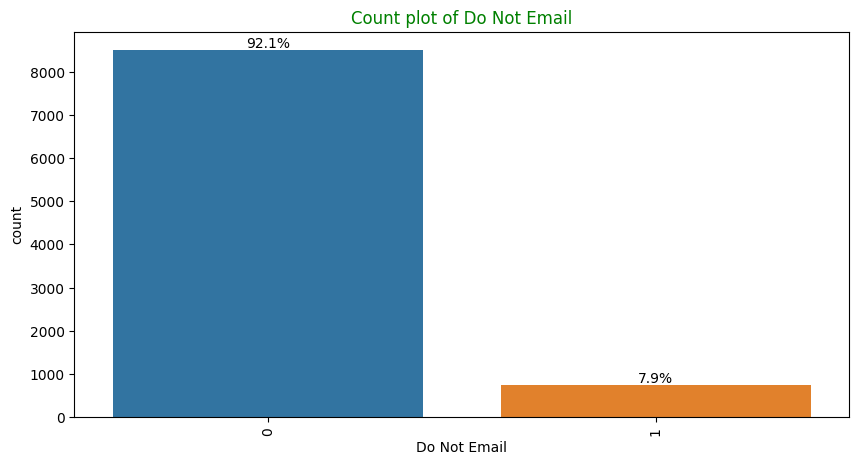

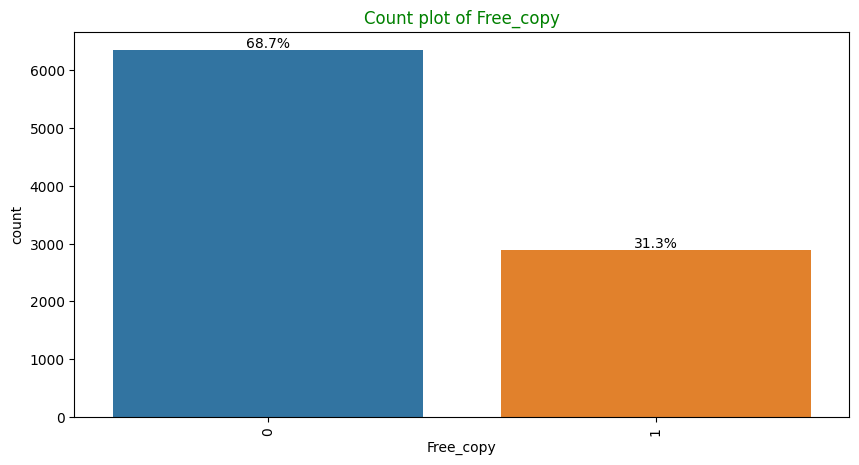

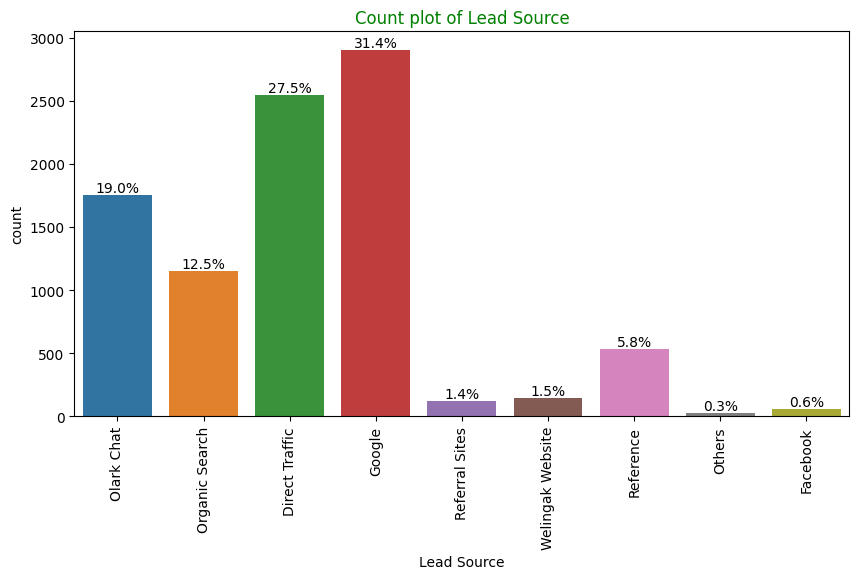

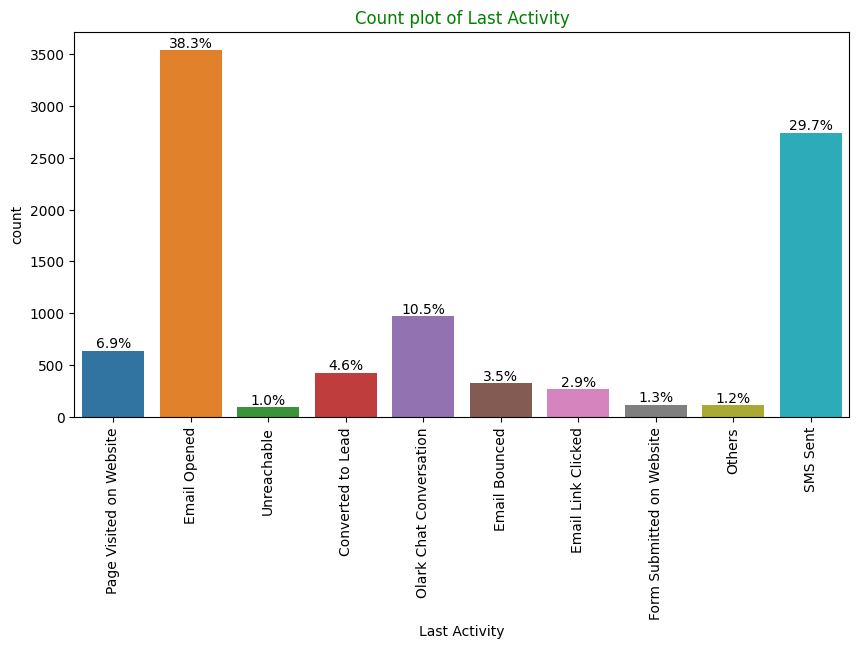

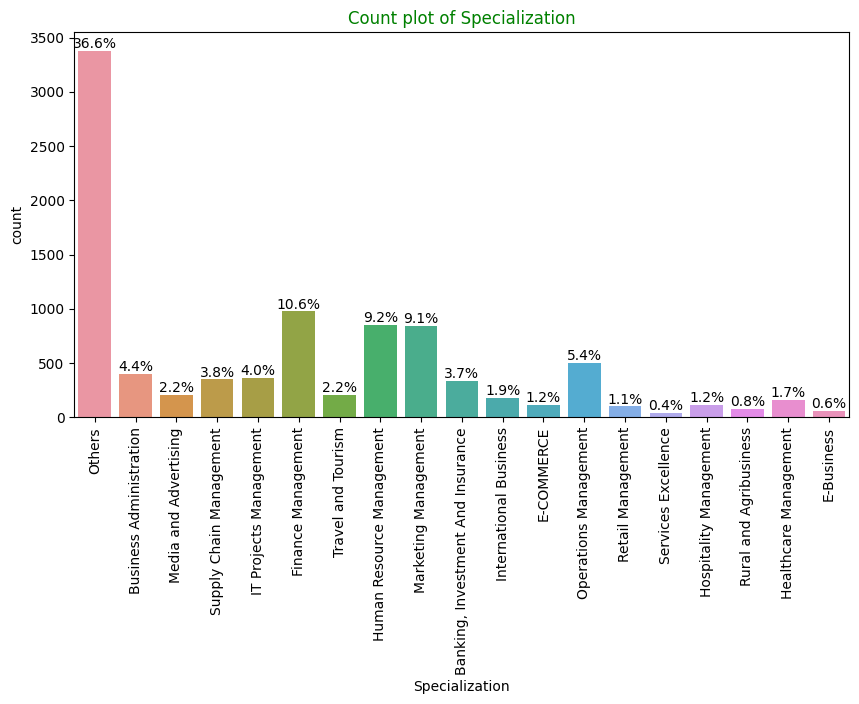

In [183]:
#Univariate analysis for all the categorical variables

for i in cat_cols:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=90)

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

**Insights from Univariate Analysis:**

Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%.

Current occupation: It has 90% of the customers as Unemployed

Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.

Lead Source: 58% Lead source is from Google & Direct Traffic combined

Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

###Bivariate Analysis

In [184]:
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat             0          0          0.0   
1                      API  Organic Search             0          0          5.0   
2  Landing Page Submission  Direct Traffic             0          1          2.0   
3  Landing Page Submission  Direct Traffic             0          0          1.0   
4  Landing Page Submission          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  Free_copy  
0                   Others                      Unemployed          0  
1                   Others                      Unemployed          0  
2  Business Administration                         Student          1  
3    Media and Advertising                      Unemployed          0  
4                   Others                      Unemployed          0

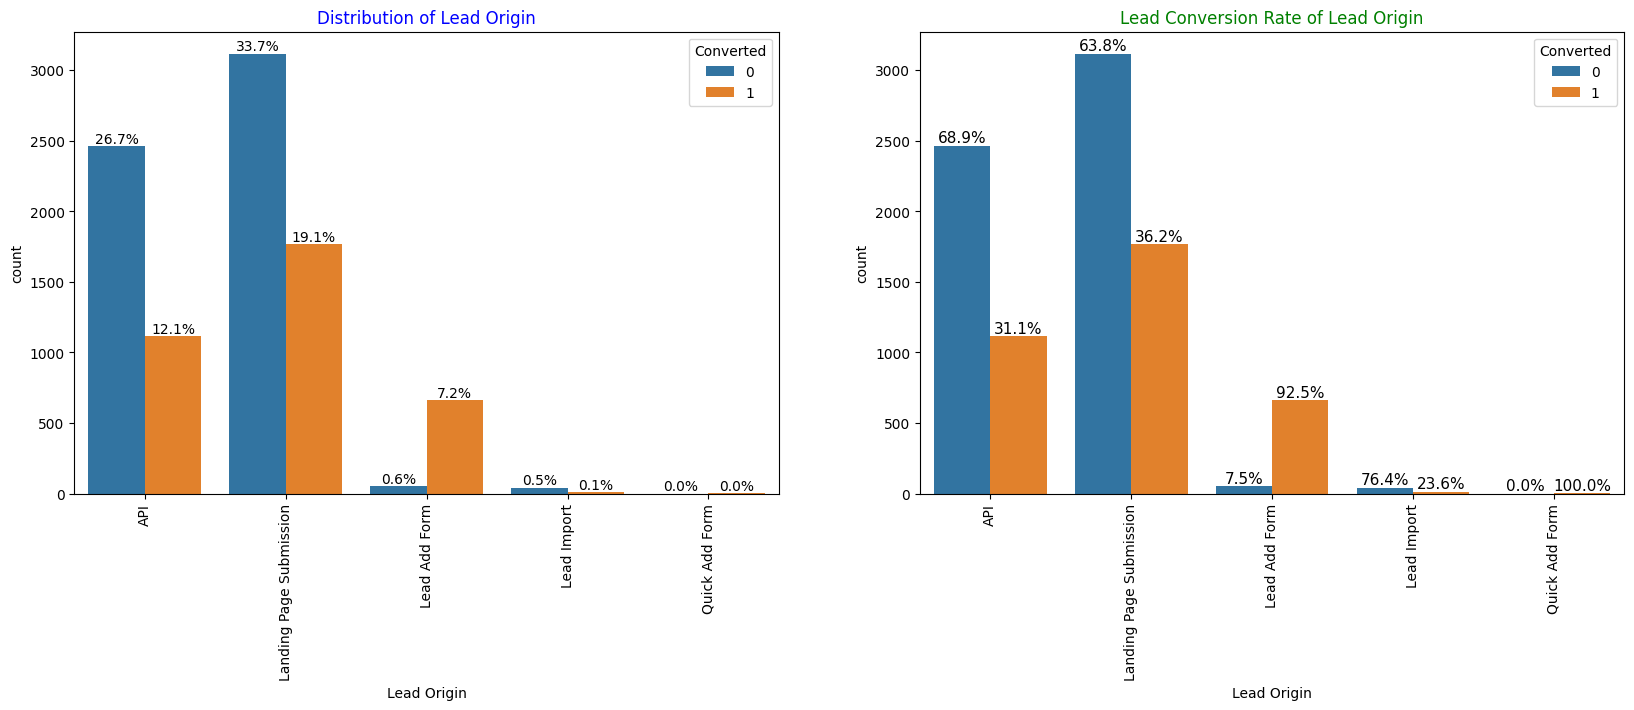

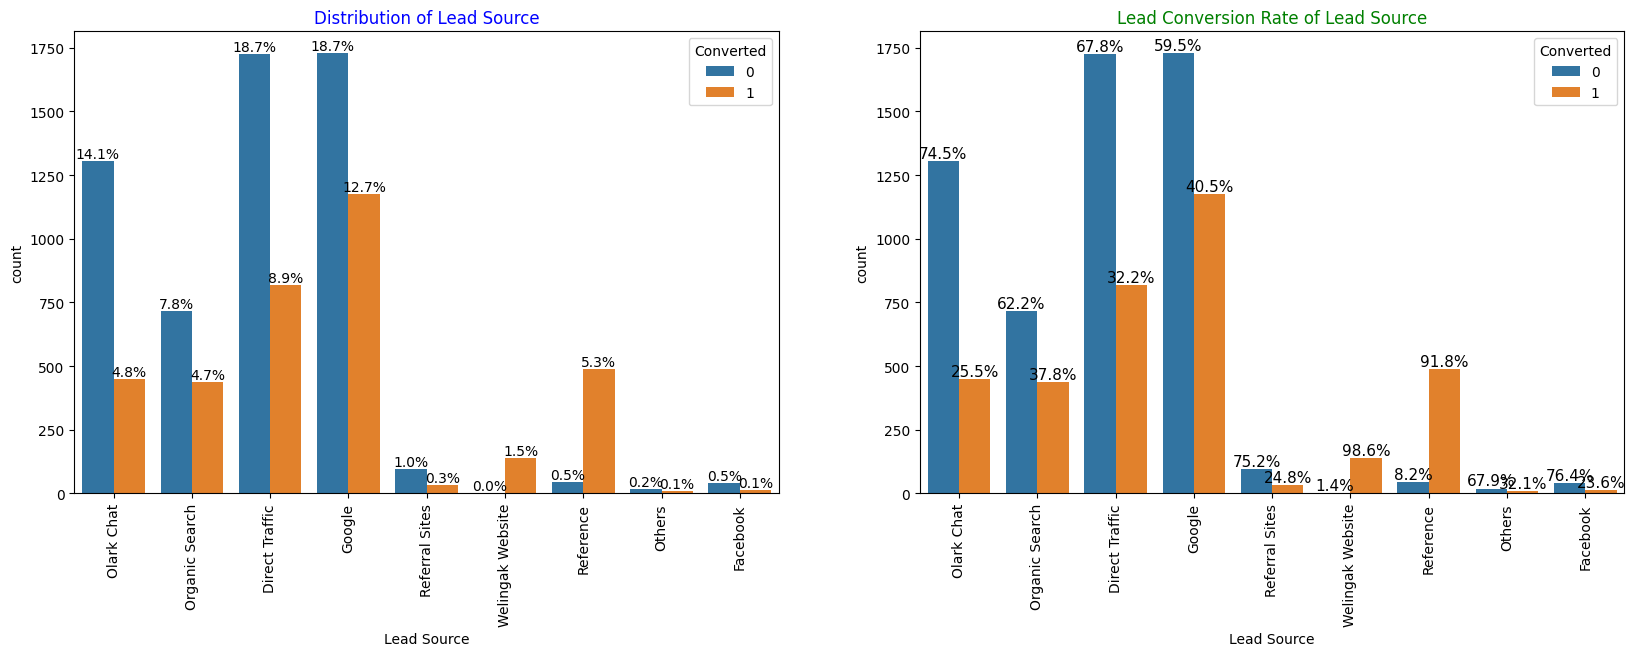

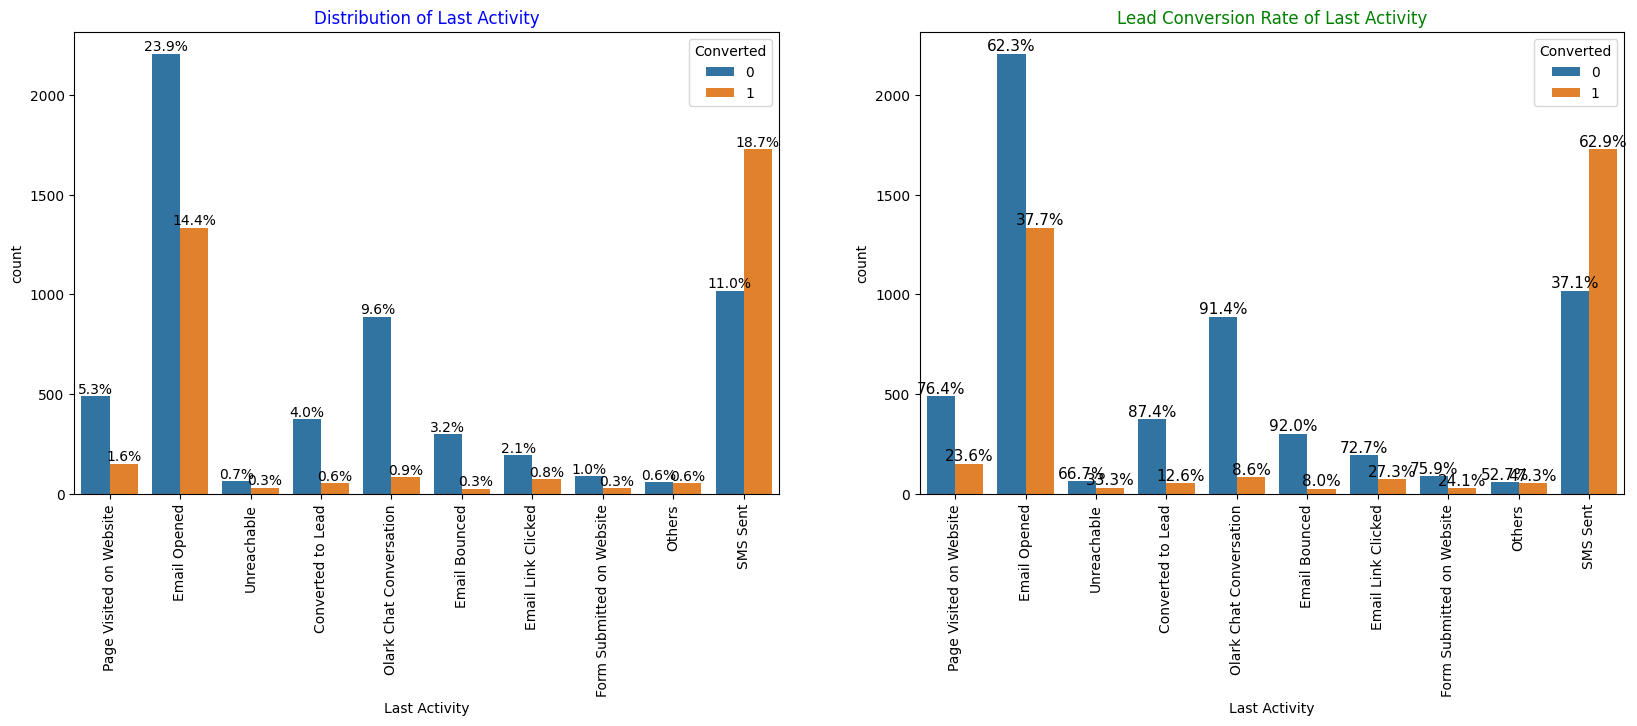

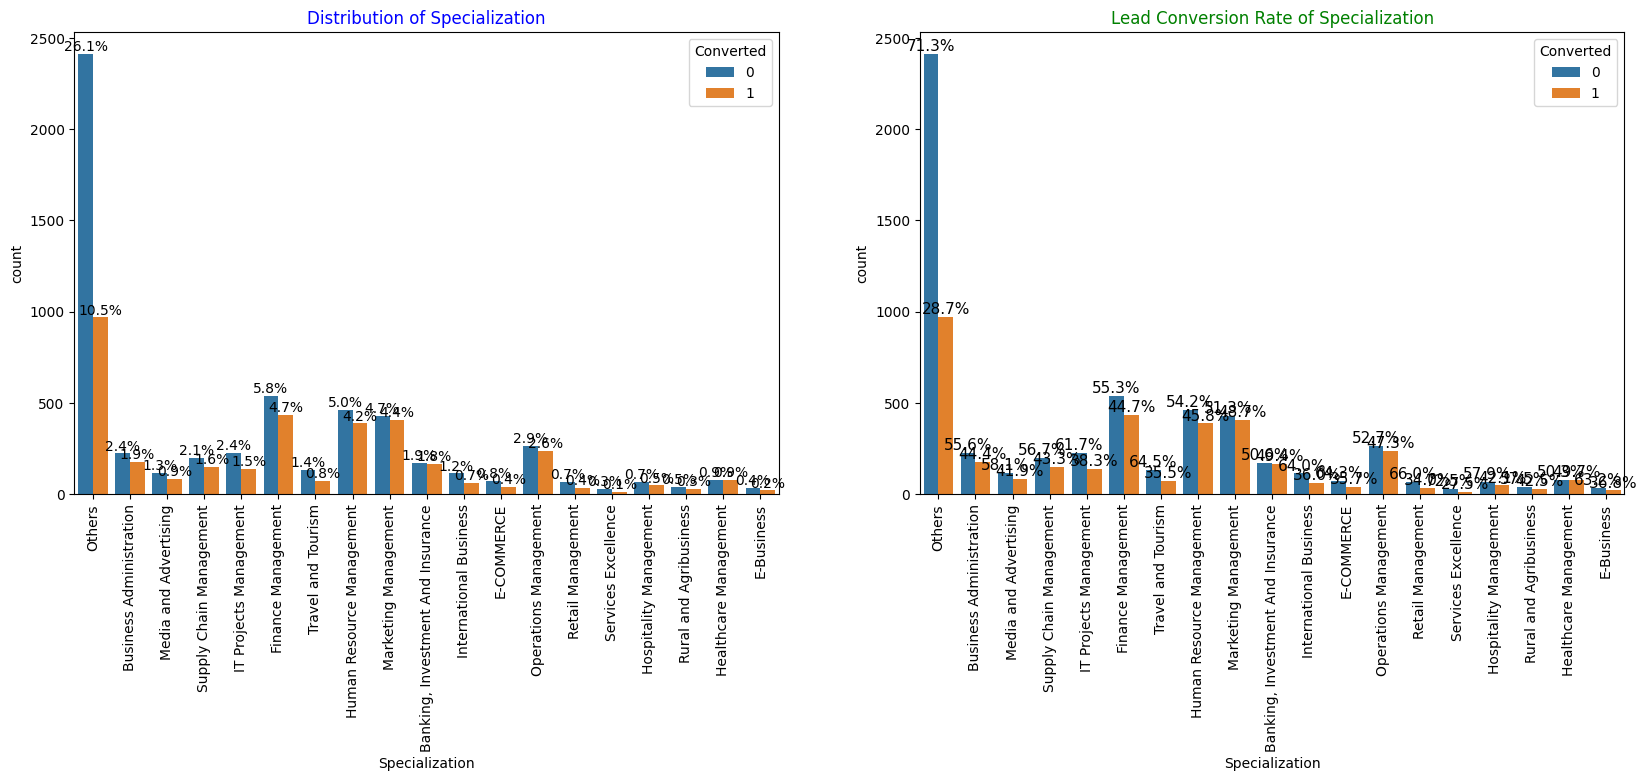

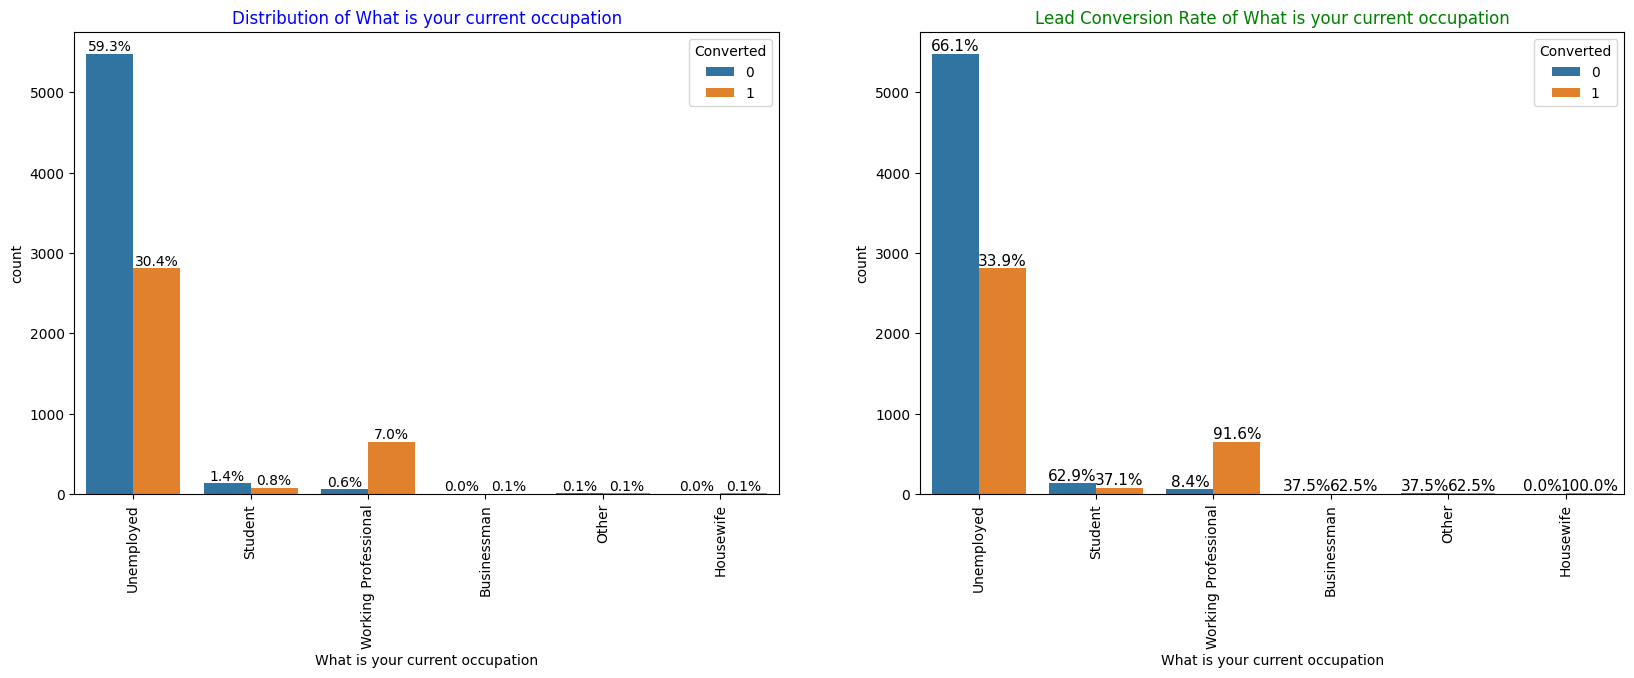

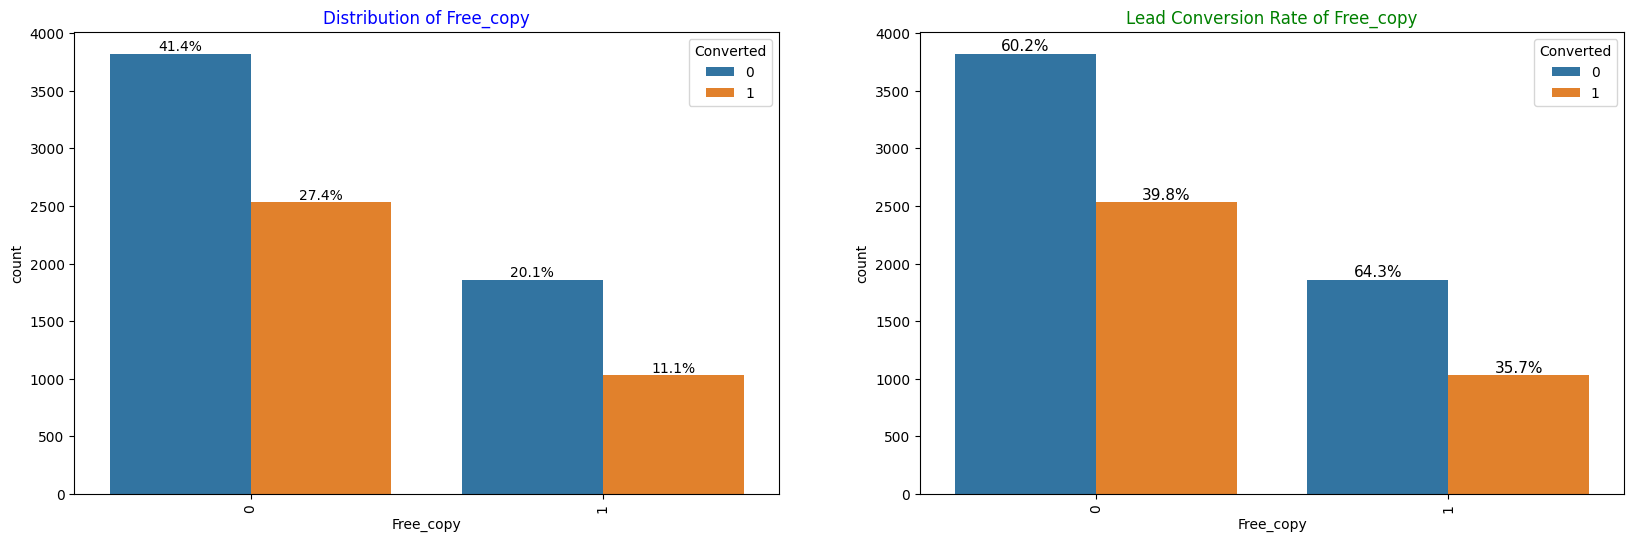

In [185]:
#Bivariate analysis for categorical variables

cat_cols = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Free_copy']


for col in cat_cols:
  plt.figure(figsize=(20,6))
  plt.subplot(1,2,1)
  plt.title("Distribution of {}".format(col),color="blue")
  ax=sns.countplot(x=col, hue='Converted', data=df)
  plt.xticks(rotation=90)
  total=len(df['Lead Origin'])
  for p in ax.patches:
          text = '{:.1f}%'.format(100*(p.get_height()/total))
          x = p.get_x() + p.get_width() / 2
          y = p.get_height()

          ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
          plt.xticks(rotation=90)


  plt.subplot(1,2,2)
  plt.title("Lead Conversion Rate of {}".format(col),color="green",fontsize=12)
  ax1=sns.countplot(x=col, hue='Converted', data=df)
  all_heights = [[p.get_height() for p in bars] for bars in ax1.containers]
  for bars in ax1.containers:
      for i, p in enumerate(bars):
          total = sum(xgroup[i] for xgroup in all_heights)
          percentage = f'{(100 * p.get_height() / total) :.1f}%'
          ax1.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
          plt.xticks(rotation=90)


**Insights:**


* In Lead Origin: About 52% of all leads originated from "Landing Page Submission" with a conversion rate of 36%.The "API" identified approximately 39% of customers with a lead conversion rate (LCR) of 31%.
*   Current_occupation: Around 90% of the customers are Unemployed with lead conversion rate (LCR) of 34%. While Working Professional contribute only 7.6% of total customers with almost 92% lead conversion rate (LCR).

* Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.

  Note: We have assumed LCR as Lead Conversion Rate in short form.

* Lead Source: Google has LCR of 40% out of 31% customers , Direct Traffic contributes 32% LCR with 27% customers which is lower than Google,Organic Search also gives 37.8% of LCR but the contribution is by only 12.5% of customers ,Reference has LCR of 91% but there are only around 6% of customers through this Lead Source.

* Last Activity: 'SMS Sent' has high lead conversion rate of 63% with 30% contribution from last activities, 'Email Opened' activity contributed 38% of last activities performed by the customers with 37% lead conversion rate.

###Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

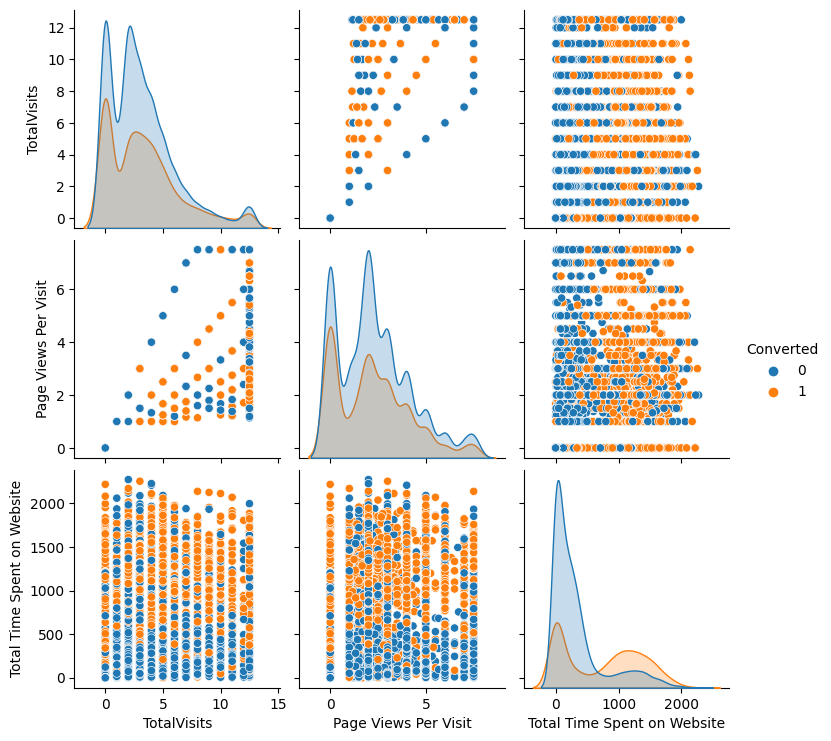

In [186]:
num_cols =['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
plt.figure(figsize=(16, 4))
sns.pairplot(data=df,vars=num_cols,hue="Converted")
plt.show()

There seems to be a linear relation between 'Page Views Per Visit' and 'Total Visits'

###Multivariate Analysis

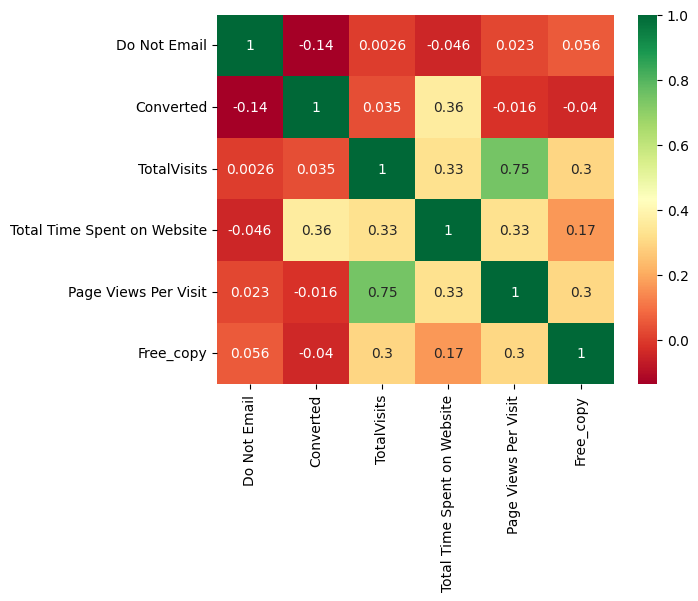

In [187]:
sns.heatmap(data=df.corr(),cmap="RdYlGn",annot=True)
plt.show()

There seems to be a strong correlation between 'Page Views Per Visit' and 'Total Visits'

#Data Preparation

In [188]:
# Creating a dummy variable for categorical variables and dropping the first one.
dummy = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

df = df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"],1)

df.shape

(9240, 50)

In [189]:
df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0             0          0          0.0                            0                   0.0   
1             0          0          5.0                          674                   2.5   
2             0          1          2.0                         1532                   2.0   
3             0          0          1.0                          305                   1.0   
4             0          1          2.0                         1428                   1.0   

   Free_copy  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0          0                                    0                          0   
1          0                                    0                          0   
2          1                                    1                          0   
3          0                                    1                          0   
4          0                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
0                        0                           0                     0                   0   
1                        0                           0                     0                   0   
2                        0                           0                     0                   0   
3                        0                           0                     0                   0   
4                        0                           0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                       1                           0                   0                      0   
1                       0                           1                   0                      0   
2                       0                           0                   0                      0   
3                       0                           0                   0                      0   
4                       0                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                           0                             0                            0   
1                           0                             0                            0   
2                           0                             0                            0   
3                           0                             0                            0   
4                           0                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  \
0                                        0                                      0   
1                                        0                                      0   
2                                        0                                      0   
3                                        0                                      0   
4                                        0                                      0   

   Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                     0                                      1                       0   
1                     0                                      0                       0   
2                 

#Train-Test Split

In [190]:
# Putting predictor variables to X
X = df.drop('Converted', axis=1)

# Putting Target variables to y
y = df["Converted"]

In [191]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [192]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 49) 
y_train: (6468,)


In [193]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 49) 
y_test: (2772,)


#Feature Scaling

In [194]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

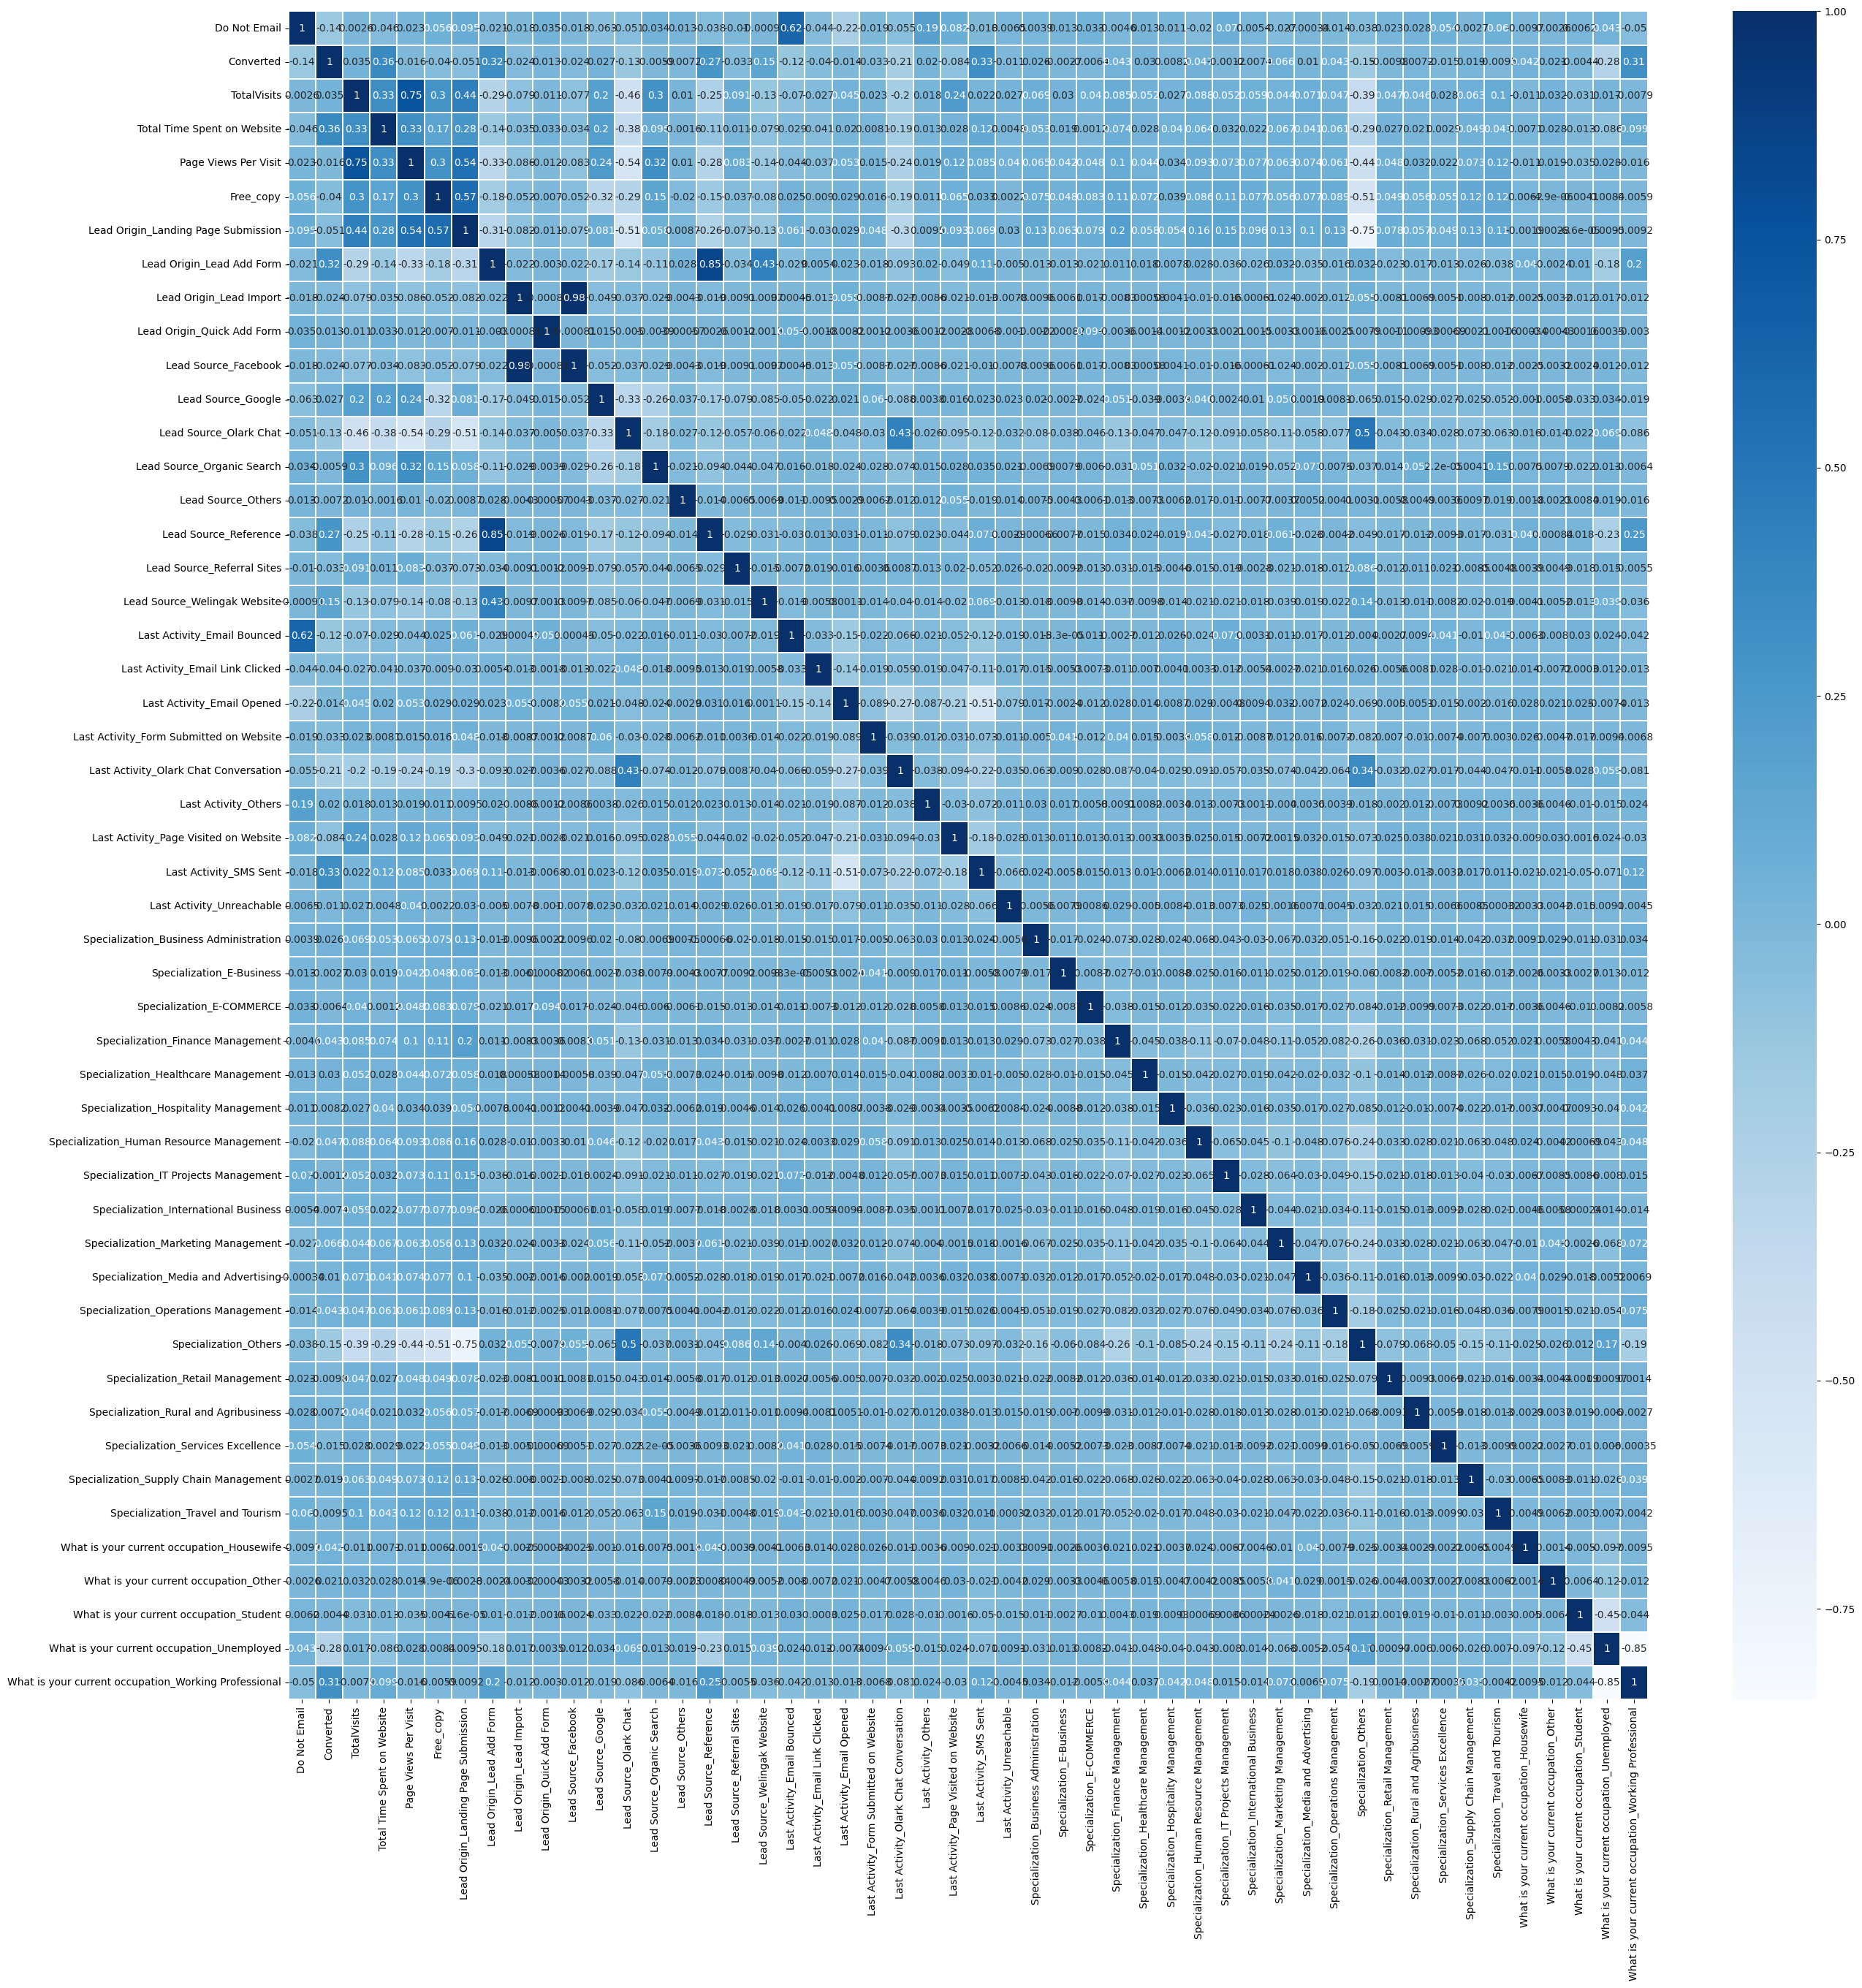

In [195]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

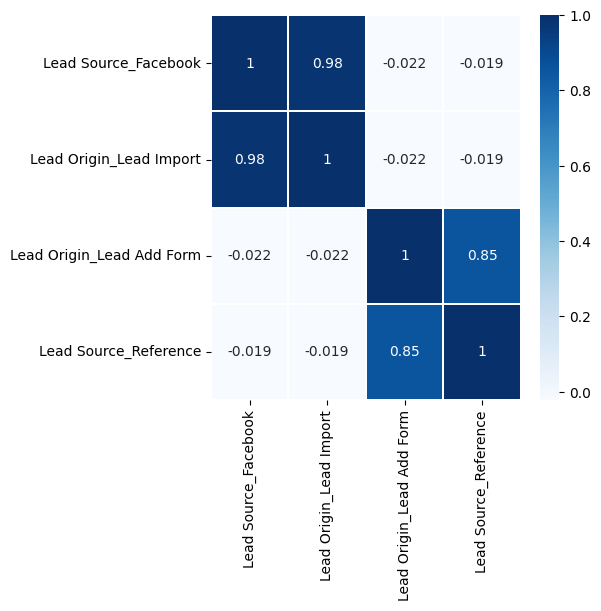

In [196]:
plt.figure(figsize = (5,5))
sns.heatmap(df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

In [197]:
#Dropping the columns with high correlation

X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

#Model Building

In [198]:
#Using rfe to narrow down variables

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train,y_train)

In [199]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Free_copy', False, 14),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 28),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 8),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Specializa

In [200]:
#Displaying the top 20 in a column form

top20=pd.DataFrame()
top20['features']=X_train.columns
top20['Feature Chosen'] = rfe.support_
top20['Ranking']=rfe.ranking_
top20.sort_values(by='Ranking')

features  Feature Chosen  Ranking
23                          Last Activity_Unreachable            True        1
44            What is your current occupation_Student            True        1
43              What is your current occupation_Other            True        1
42          What is your current occupation_Housewife            True        1
38              Specialization_Rural and Agribusiness            True        1
36                              Specialization_Others            True        1
29              Specialization_Hospitality Management            True        1
45         What is your current occupation_Unemployed            True        1
22                             Last Activity_SMS Sent            True        1
20                               Last Activity_Others            True        1
19              Last Activity_Olark Chat Conversation            True        1
17                         Last Activity_Email Opened            True        1
14                       Lead Source_Welingak Website            True        1
46  What is your current occupation_Working Profes...            True        1
12                              Lead Source_Reference            True        1
11                                 Lead Source_Others            True        1
2                         Total Time Spent on Website            True        1
9                              Lead Source_Olark Chat            True        1
5                 Lead Origin_Landing Page Submission            True        1
7                                Lead Source_Facebook            True        1
16                   Last Activity_Email Link Clicked           False        2
32              Specialization_International Business           False        3
37                   Specialization_Retail Management           False        4
1                                         TotalVisits           False        5
3                                Page Views Per Visit           False        6
0                                        Do Not Email           False        7
21              Last Activity_Page Visited on Website           False        8
24             Specialization_Business Administration           False        9
15                        Last Activity_Email Bounced           False       10
35               Specialization_Operations Management           False       11
30           Specialization_Human Resource Management           False       12
33                Specialization_Marketing Management           False       13
4                                           Free_copy           False       14
6                          Lead Origin_Quick Add Form           False       15
39                 Specialization_Services Excellence           False       16
40             Specialization_Supply Chain Management           False       17
8                                  Lead Source_Google           False       18
26                          Specialization_E-COMMERCE           False       19
31              Specialization_IT Projects Management           False       20
13                         Lead Source_Referral Sites           False       21
28               Specialization_Healthcare Management           False       22
27                  Specialization_Finance Management           False       23
10                         Lead Source_Organic Search           False       24
34               Specialization_Media and Advertising           False       25
25                          Specialization_E-Business           False       26
41                  Specialization_Travel and Tourism           False       27
18            Last Activity_Form Submitted on Website           False       28

In [201]:
#Selected columns

rfe_selected = X_train.columns[rfe.support_]
rfe_selected

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife', 'What is your current occupation_Other',
       'What is your current occupation_Student', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [202]:
#Dropped columns

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management', 'Specialization_Healthcare Management',
       'Specialization_Human Resource Management', 'Specialization_IT Projects Management',
       'Specialization_International Business', 'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Operations Management',
       'Specialization_Retail Management', 'Specialization_Services Excellence',
       'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism'],
      dty

In [203]:
#UDF to get the VIF values

def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

##Model 1

In [204]:
# columns selected by RFE to be used for this model
rfe_selected=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_selected]

# Adding a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

logm1.params

const                                                   -0.784807
Total Time Spent on Website                              1.050127
Lead Origin_Landing Page Submission                     -1.280758
Lead Source_Facebook                                    -0.701594
Lead Source_Olark Chat                                   0.888917
Lead Source_Others                                       0.762007
Lead Source_Reference                                    2.882335
Lead Source_Welingak Website                             5.386023
Last Activity_Email Opened                               0.949291
Last Activity_Olark Chat Conversation                   -0.550569
Last Activity_Others                                     1.436588
Last Activity_SMS Sent                                   2.074956
Last Activity_Unreachable                                1.009644
Specialization_Hospitality Management                   -1.072710
Specialization_Others                                   -1.195267
Specializa

In [205]:
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2730.3
Date:                Tue, 17 Oct 2023   Deviance:                       5460.5
Time:                        13:19:24   Pearson chi2:                 8.16e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3844
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Dropping What is your current occupation_Housewife

##Model 2

In [208]:
# Dropping 'What is your current occupation_Housewife' column
rfe_selected=rfe_selected.drop("What is your current occupation_Housewife")

KeyError: ignored

In [209]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_selected]

# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

logm2.params

const                                                   1.144760
Total Time Spent on Website                             1.049523
Lead Origin_Landing Page Submission                    -1.270154
Lead Source_Facebook                                   -0.699236
Lead Source_Olark Chat                                  0.889499
Lead Source_Others                                      0.763055
Lead Source_Reference                                   2.886187
Lead Source_Welingak Website                            5.387224
Last Activity_Email Opened                              0.953225
Last Activity_Olark Chat Conversation                  -0.557585
Last Activity_Others                                    1.438041
Last Activity_SMS Sent                                  2.075801
Last Activity_Unreachable                               0.986289
Specialization_Hospitality Management                  -1.072486
Specialization_Others                                  -1.188880
Specialization_Rural and 

In [210]:
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.4
Date:                Tue, 17 Oct 2023   Deviance:                       5466.9
Time:                        13:20:42   Pearson chi2:                 8.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3838
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Dropping What is your current occupation_Working Professional

##Model 3

In [211]:
# Dropping 'What is your current occupation_Working Professional ' column
rfe_selected=rfe_selected.drop("What is your current occupation_Working Professional")

In [212]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_selected]

# Adding a constant variable
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

logm3.params

const                                         1.615927
Total Time Spent on Website                   1.049712
Lead Origin_Landing Page Submission          -1.269752
Lead Source_Facebook                         -0.697874
Lead Source_Olark Chat                        0.889806
Lead Source_Others                            0.763346
Lead Source_Reference                         2.885927
Lead Source_Welingak Website                  5.387708
Last Activity_Email Opened                    0.954607
Last Activity_Olark Chat Conversation        -0.558047
Last Activity_Others                          1.440835
Last Activity_SMS Sent                        2.077642
Last Activity_Unreachable                     0.986308
Specialization_Hospitality Management        -1.070651
Specialization_Others                        -1.188742
Specialization_Rural and Agribusiness         0.502476
What is your current occupation_Other        -2.708180
What is your current occupation_Student      -2.234419
What is yo

In [213]:
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.6
Date:                Tue, 17 Oct 2023   Deviance:                       5467.2
Time:                        13:21:21   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3837
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

#Model Evaluation

In [214]:
y_train_pred = logm3.predict(X_train_sm3)

In [215]:
y_train_pred = y_train_pred.values.reshape(-1)

In [216]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

Converted  Converted_Prob  Prospect ID
0          0        0.466078         1871
1          0        0.072506         6795
2          0        0.245818         3516
3          0        0.766750         8105
4          0        0.210047         3934

Taking 0.5 as the default cutoff value

In [217]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.466078         1871          0
1          0        0.072506         6795          0
2          0        0.245818         3516          0
3          0        0.766750         8105          1
4          0        0.210047         3934          0

###Confusion Matrix

In [218]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3585  417]
 [ 843 1623]]


###Accuracy

In [220]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8051948051948052


###Sensitivity & Specificity

In [221]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [222]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6581508515815085


In [223]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.8958020989505248


In [224]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10419790104947527


In [225]:
# positive predictive value
print (TP / float(TP+FP))

0.7955882352941176


In [226]:
# Negative predictive value
print (TN / float(TN+ FN))

0.809620596205962


##ROC Curve

In [227]:
#UDF to draw the ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [228]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

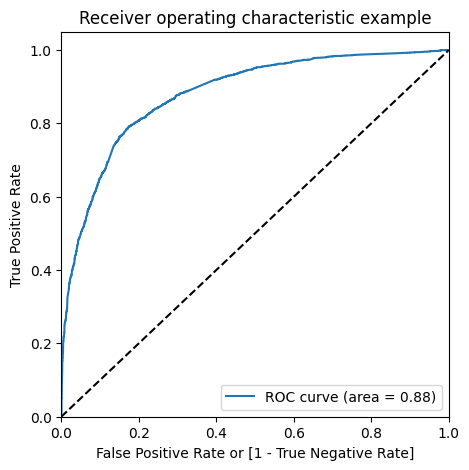

In [229]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

In [230]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0          0        0.466078         1871          0    1    1    1    1    1    0    0    0    0   
1          0        0.072506         6795          0    1    0    0    0    0    0    0    0    0   
2          0        0.245818         3516          0    1    1    1    0    0    0    0    0    0   
3          0        0.766750         8105          1    1    1    1    1    1    1    1    1    0   
4          0        0.210047         3934          0    1    1    1    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [231]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.598794  0.973236  0.368066
0.2   0.2  0.720161  0.920114  0.596952
0.3   0.3  0.790971  0.834955  0.763868
0.4   0.4  0.815399  0.766829  0.845327
0.5   0.5  0.805195  0.658151  0.895802
0.6   0.6  0.793908  0.587997  0.920790
0.7   0.7  0.779375  0.508110  0.946527
0.8   0.8  0.755875  0.408759  0.969765
0.9   0.9  0.709957  0.253447  0.991254


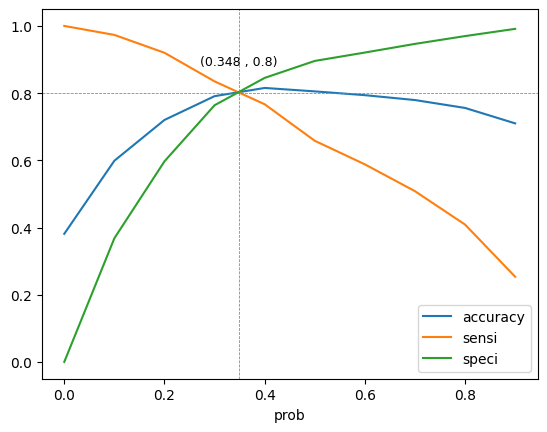

In [232]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


0.348 is the approx. point where all the curves meet, so it seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point

In [233]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.348 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.466078         1871                1
1          0        0.072506         6795                0
2          0        0.245818         3516                0
3          0        0.766750         8105                1
4          0        0.210047         3934                0

###Calculating all metrics using confusion matrix for Train

In [234]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8064316635745207


In [235]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]

accuracy = (TN+TP)/(TN+TP+FN+FP)
sensi = TP/(TP+FN)
speci = TN/(TN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)

#Calculate false postive rate - predicting conversion when customer does not have converted
FPR = FP/(FP + TN)
FNR = FN/(FN +TP)

print ("True Negative                    : ", TN)
print ("True Positive                    : ", TP)
print ("False Negative                   : ", FN)
print ("False Positve                    : ", FP)

print ("Model Accuracy                   : ", round(accuracy,4))
print ("Model Sensitivity                : ", round(sensi,4))
print ("Model Specificity                : ", round(speci,4))
print ("Model Precision                  : ", round(precision,4))
print ("Model Recall                     : ", round(recall,4))
print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3240  762]
 [ 490 1976]] 

************************************************** 

True Negative                    :  3240
True Positive                    :  1976
False Negative                   :  490
False Positve                    :  762
Model Accuracy                   :  0.8064
Model Sensitivity                :  0.8013
Model Specificity                :  0.8096
Model Precision                  :  0.7217
Model Recall                     :  0.8013
Model True Positive Rate (TPR)   :  0.8013
Model False Positive Rate (FPR)  :  0.1904


************************************************** 



###Precision and recall tradeoff

In [239]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

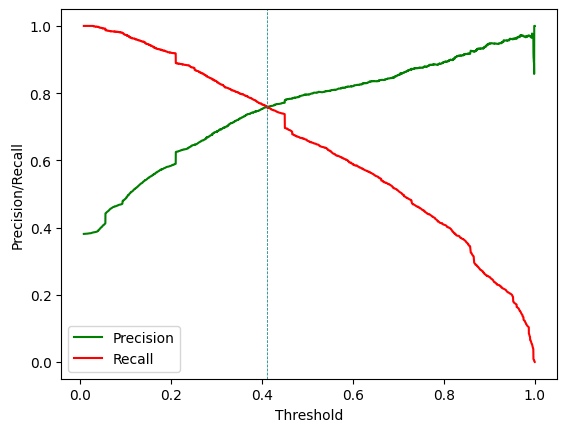

In [241]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.4 aprrox from above curve.

In [242]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [243]:
# assigning a feature for 0.4 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  precision_recall_prediction
0          0        0.466078         1871                1                            1
1          0        0.072506         6795                0                            0
2          0        0.245818         3516                0                            0
3          0        0.766750         8105                1                            1
4          0        0.210047         3934                0                            0

In [244]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.348 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")


TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]

accuracy = (TN+TP)/(TN+TP+FN+FP)
sensi = TP/(TP+FN)
speci = TN/(TN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)

#Calculate false postive rate - predicting conversion when customer does not have converted
FPR = FP/(FP + TN)
FNR = FN/(FN +TP)

print ("True Negative                    : ", TN)
print ("True Positive                    : ", TP)
print ("False Negative                   : ", FN)
print ("False Positve                    : ", FP)

print ("Model Accuracy                   : ", round(accuracy,4))
print ("Model Sensitivity                : ", round(sensi,4))
print ("Model Specificity                : ", round(speci,4))
print ("Model Precision                  : ", round(precision,4))
print ("Model Recall                     : ", round(recall,4))
print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3403  599]
 [ 592 1874]] 

************************************************** 

True Negative                    :  3403
True Positive                    :  1874
False Negative                   :  592
False Positve                    :  599
Model Accuracy                   :  0.8159
Model Sensitivity                :  0.7599
Model Specificity                :  0.8503
Model Precision                  :  0.7578
Model Recall                     :  0.7599
Model True Positive Rate (TPR)   :  0.7599
Model False Positive Rate (FPR)  :  0.1497


************************************************** 



As we can see in above metrics when we used precision-recall threshold cut-off of 0.4 the values in True Positive Rate ,Sensitivity, Recall have slightly dropped to around 75%, which is below the estimate that the CEO has set

In [245]:
# Lets add Lead Score

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.466078         1871                1          47
1          0        0.072506         6795                0           7
2          0        0.245818         3516                0          25
3          0        0.766750         8105                1          77
4          0        0.210047         3934                0          21

#Making predictions on Test dataset

##Scaling the Dataset

In [246]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_selected]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  Lead Source_Facebook  \
4269                     0.964504                                    0                     0   
2376                    -0.885371                                    0                     0   
7766                    -0.777416                                    0                     0   
9199                    -0.885371                                    0                     0   
4359                    -0.885371                                    0                     0   

      Lead Source_Olark Chat  Lead Source_Others  Lead Source_Reference  \
4269                       0                   0                      0   
2376                       0                   0                      1   
7766                       0                   0                      0   
9199                       1                   0                      0   
4359                       0                   0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_SMS Sent  \
4269                                      0                     0                       1   
2376                                      0                     0                       1   
7766                                      0                     0                       0   
9199                                      1                     0                       0   
4359                                      0                     0                       0   

      Last Activity_Unreachable  Specialization_Hospitality Management  Specialization_Others  \
4269                          0                                      0                      1   
2376                          0                                      0                      1   
7766                          1                                      0                      0   
9199                          0                                      0                      1   
4359                          0                                      0                      0   

      Specialization_Rural and Agribusiness  What is your current occupation_Other  \
4269                                      0                                      0   
2376                                      0                                      0   
7766                                      0                                      0   
9199                                      0                                      0   
4359                                      0                                      0   

      What is your current occupation_Student  What is your current occupation_Unemployed  
4269                                        0                                           1  
2376                                        0                                           1  
7766                                        0                                           0  
9199                                        0                                           1  
4359                                        0                                           1

##Test data prediction

In [247]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 19)

In [248]:
# making prediction using model 4 (final model)
y_test_pred = logm3.predict(X_test_sm)

In [249]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.700656
2376  0.857480
7766  0.856457
9199  0.055342
4359  0.865323

In [250]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [251]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.700656
1          1         2376  0.857480
2          1         7766  0.856457
3          0         9199  0.055342
4          1         4359  0.865323

In [252]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.700656
1         2376          1        0.857480
2         7766          1        0.856457
3         9199          0        0.055342
4         4359          1        0.865323

In [253]:
# taking sensitivity-specificity method at 0.40 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.348 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.700656                1
1         2376          1        0.857480                1
2         7766          1        0.856457                1
3         9199          0        0.055342                0
4         4359          1        0.865323                1

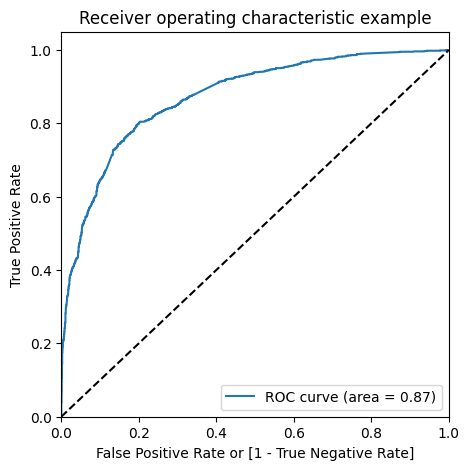

In [254]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

##Test set evaluation

In [256]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")


print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]

accuracy = (TN+TP)/(TN+TP+FN+FP)
sensi = TP/(TP+FN)
speci = TN/(TN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)

#Calculate false postive rate - predicting conversion when customer does not have converted
FPR = FP/(FP + TN)
FNR = FN/(FN +TP)

print ("True Negative                    : ", TN)
print ("True Positive                    : ", TP)
print ("False Negative                   : ", FN)
print ("False Positve                    : ", FP)

print ("Model Accuracy                   : ", round(accuracy,4))
print ("Model Sensitivity                : ", round(sensi,4))
print ("Model Specificity                : ", round(speci,4))
print ("Model Precision                  : ", round(precision,4))
print ("Model Recall                     : ", round(recall,4))
print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1354  323]
 [ 230  865]] 

************************************************** 

True Negative                    :  1354
True Positive                    :  865
False Negative                   :  230
False Positve                    :  323
Model Accuracy                   :  0.8005
Model Sensitivity                :  0.79
Model Specificity                :  0.8074
Model Precision                  :  0.7281
Model Recall                     :  0.79
Model True Positive Rate (TPR)   :  0.79
Model False Positive Rate (FPR)  :  0.1926


************************************************** 



The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
    
These matrics are very close to train set, so out final model logm3 is  performing with good consistency on both Train & Test set

In [257]:
# features and their coefficicent from final model
parameters=logm3.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website                  5.387708
Lead Source_Reference                         2.885927
Last Activity_SMS Sent                        2.077642
const                                         1.615927
Last Activity_Others                          1.440835
Total Time Spent on Website                   1.049712
Last Activity_Unreachable                     0.986308
Last Activity_Email Opened                    0.954607
Lead Source_Olark Chat                        0.889806
Lead Source_Others                            0.763346
Specialization_Rural and Agribusiness         0.502476
Last Activity_Olark Chat Conversation        -0.558047
Lead Source_Facebook                         -0.697874
Specialization_Hospitality Management        -1.070651
Specialization_Others                        -1.188742
Lead Origin_Landing Page Submission          -1.269752
What is your current occupation_Student      -2.234419
What is your current occupation_Unemployed   -2.666853
What is yo

##Adding the Lead Score

In [258]:
# Lets add Lead Score

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.700656                1          70
1         2376          1        0.857480                1          86
2         7766          1        0.856457                1          86
3         9199          0        0.055342                0           6
4         4359          1        0.865323                1          87

* The customers with a higher lead score have a higher conversion chance
* The customers with a lower lead score have a lower conversion chance.

**Train Data Set:**

Accuracy: 80.64%

Sensitivity: 80.13%

Specificity: 80.96%

Model Accuracy                   :  0.8064
Model Sensitivity                :  0.8013
Model Specificity                :  0.8096


**Test Data Set:**

Accuracy : 80.05%

Sensitivity : 79%

Specificity : 80.74%


The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.